In [128]:
import subprocess
from pathlib import Path


def clear_folder(folder_path):
    for item in folder_path.iterdir():
        if item.is_file():
            item.unlink()


video_path = Path("./data/ebsynth-maks-2/video_2023-03-25_18-43-23.mp4")
output_folder = Path("./data/ebsynth-maks-2/video-sq/")

if not output_folder.exists():
    output_folder.mkdir(parents=True, exist_ok=True)

# Очистка папки перед каждым запуском
clear_folder(output_folder)

In [129]:
import subprocess
from pathlib import Path

fps = 25
scale = 512
# Добавление фильтров масштабирования, заполнения темным и установки FPS
command = f'ffmpeg -i "{video_path.as_posix()}" -vf "fps={fps},scale={scale}:{scale}:force_original_aspect_ratio=increase,crop={scale}:{scale}" "{(output_folder / "%04d.png").as_posix()}"'

# Добавление фильтров масштабирования, заполнения темным и установки FPS
# command = f'ffmpeg -i "{video_path.as_posix()}" -vf "fps={fps},scale={max_size}:{max_size}:force_original_aspect_ratio=decrease,pad={max_size}:{max_size}:(ow-iw)/2:(oh-ih)/2:black" "{(output_folder / "%04d.png").as_posix()}"'

try:
    result = subprocess.run(command, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
except subprocess.CalledProcessError as e:
    print(f"Error: {e.returncode}")
    print("FFmpeg output:")
    print(e.stderr.decode())


Сбор в сетку

In [133]:
from pathlib import Path
from PIL import Image
import math


def create_grid(input_folder, output_image_path, num_rows, num_columns):
    image_paths = sorted([p for p in input_folder.glob("*.png")])
    total_images = num_rows * num_columns
    step = math.ceil(len(image_paths) / total_images)
    selected_image_paths = image_paths[::step][:total_images]
    images = [Image.open(p) for p in selected_image_paths]
    width, height = images[0].size
    grid_width = num_columns * width
    grid_height = num_rows * height
    grid_image = Image.new("RGB", (grid_width, grid_height))

    for i, image in enumerate(images):
        x = (i % num_columns) * width
        y = (i // num_columns) * height
        grid_image.paste(image, (x, y))

    grid_image.save(output_image_path)

    return grid_image, selected_image_paths

def extract_images(grid_image_path, output_folder, num_rows, num_columns, image_filenames):
    grid_image = Image.open(grid_image_path)
    img_width, img_height = grid_image.size[0] // num_columns, grid_image.size[1] // num_rows

    for i, image_filename in enumerate(image_filenames):
        x = (i % num_columns) * img_width
        y = (i // num_columns) * img_height
        cropped_image = grid_image.crop((x, y, x + img_width, y + img_height))
        image_path = Path(image_filename)
        extracted_image_filename = f"extracted_image_{image_path.stem}.png"
        print(x, y, x + img_width, y + img_height, image_path.stem)
        cropped_image.save(output_folder / extracted_image_filename)



input_folder = Path("./data/ebsynth-maks-2/keyframes/")
output_image_path = Path("./data/ebsynth-maks-2/video-grid/image_grid.png")

num_rows = 4
num_columns = 4

output_image_path.parent.mkdir(parents=True, exist_ok=True)

if output_image_path.exists():
    output_image_path.unlink()

grid_image, selected_image_paths = create_grid(input_folder, output_image_path, num_rows, num_columns)

In [134]:
selected_image_paths

[WindowsPath('data/ebsynth-maks-2/keyframes/0001.png'),
 WindowsPath('data/ebsynth-maks-2/keyframes/0036.png'),
 WindowsPath('data/ebsynth-maks-2/keyframes/0054.png'),
 WindowsPath('data/ebsynth-maks-2/keyframes/0063.png'),
 WindowsPath('data/ebsynth-maks-2/keyframes/0072.png'),
 WindowsPath('data/ebsynth-maks-2/keyframes/0102.png'),
 WindowsPath('data/ebsynth-maks-2/keyframes/0129.png'),
 WindowsPath('data/ebsynth-maks-2/keyframes/0141.png'),
 WindowsPath('data/ebsynth-maks-2/keyframes/0148.png'),
 WindowsPath('data/ebsynth-maks-2/keyframes/0168.png'),
 WindowsPath('data/ebsynth-maks-2/keyframes/0196.png'),
 WindowsPath('data/ebsynth-maks-2/keyframes/0214.png'),
 WindowsPath('data/ebsynth-maks-2/keyframes/0238.png'),
 WindowsPath('data/ebsynth-maks-2/keyframes/0246.png'),
 WindowsPath('data/ebsynth-maks-2/keyframes/0268.png'),
 WindowsPath('data/ebsynth-maks-2/keyframes/0322.png')]

In [2]:
# grid_image

In [96]:
num_rows, num_columns, selected_image_paths

(3,
 4,
 [WindowsPath('data/ebsynth-maks-2/keyframes/0001.png'),
  WindowsPath('data/ebsynth-maks-2/keyframes/0054.png'),
  WindowsPath('data/ebsynth-maks-2/keyframes/0072.png'),
  WindowsPath('data/ebsynth-maks-2/keyframes/0102.png'),
  WindowsPath('data/ebsynth-maks-2/keyframes/0129.png'),
  WindowsPath('data/ebsynth-maks-2/keyframes/0141.png'),
  WindowsPath('data/ebsynth-maks-2/keyframes/0148.png'),
  WindowsPath('data/ebsynth-maks-2/keyframes/0168.png'),
  WindowsPath('data/ebsynth-maks-2/keyframes/0196.png'),
  WindowsPath('data/ebsynth-maks-2/keyframes/0238.png'),
  WindowsPath('data/ebsynth-maks-2/keyframes/0268.png'),
  WindowsPath('data/ebsynth-maks-2/keyframes/0322.png')])

Извлевение сетки

In [171]:
grid_image_path = Path("./data/ebsynth-maks-2/video-grid/image_grid-sd-10-up.png")
output_folder = Path("./data/ebsynth-maks-2/sd-keyframes-up/")
output_folder.mkdir(parents=True, exist_ok=True)
extract_images(grid_image_path, output_folder, num_rows, num_columns, selected_image_paths)


0 0 896 896 0001
896 0 1792 896 0036
1792 0 2688 896 0054
2688 0 3584 896 0063
0 896 896 1792 0072
896 896 1792 1792 0102
1792 896 2688 1792 0129
2688 896 3584 1792 0141
0 1792 896 2688 0148
896 1792 1792 2688 0168
1792 1792 2688 2688 0196
2688 1792 3584 2688 0214
0 2688 896 3584 0238
896 2688 1792 3584 0246
1792 2688 2688 3584 0268
2688 2688 3584 3584 0322


In [93]:
2740 / 3

913.3333333333334

In [91]:
1096 - 365

731

Aspec Ratio Calculator

In [109]:
def resize_dimensions(width, height, max_width, max_height):
    aspect_ratio = float(width) / float(height)

    if width > max_width:
        width = max_width
        height = int(width / aspect_ratio)

    if height > max_height:
        height = max_height
        width = int(height * aspect_ratio)

    return width, height

original_width = 2048
original_height = 2730
max_width = 2568
max_height = 2568

new_width, new_height = resize_dimensions(original_width, original_height, max_width, max_height)

print(f"Original dimensions: {original_width}x{original_height}")
print(f"New dimensions: {new_width}x{new_height}")


Original dimensions: 2048x2730
New dimensions: 1926x2568


In [137]:
1000*750, 900*900

(750000, 810000)

Resize

In [140]:
from PIL import Image
from pathlib import Path

def resize_images(input_folder, output_folder, target_size):
    output_folder = Path(output_folder)
    output_folder.mkdir(parents=True, exist_ok=True)
    
    for file_path in Path(input_folder).glob("*"):
        output_path = output_folder / file_path.name
        with Image.open(file_path) as image:
            image = image.resize(target_size)
            image.save(output_path)


In [172]:
input_folder = Path("./data/ebsynth-maks-2/sd-keyframes-up/")
output_folder = Path("./data/ebsynth-maks-2/sd-keys-fit/")
target_size = (512, 512)

output_folder.mkdir(parents=True, exist_ok=True)
clear_folder(output_folder)
resize_images(input_folder, output_folder, target_size)

Сбор Фреймов

In [160]:
from pathlib import Path
import shutil

input_folders = sorted(Path('./data/ebsynth-maks-2/').glob('out*'))
output_folder = Path("./data/ebsynth-maks-2/eb-frames")

# Создаем выходную папку, если её нет
if not output_folder.exists():
    output_folder.mkdir()

# Очищаем папку output_folder перед использованием
def clear_folder(folder):
    for item in folder.glob("*"):
        if item.is_file():
            item.unlink()

clear_folder(output_folder)

# Настройки пересечения
overlap_ratio = 0.65

def copy_with_overlap(first_folder, second_folder, overlap_ratio):
    first_folder_files = sorted([file for file in first_folder.glob("*.png")])
    second_folder_files = sorted([file for file in second_folder.glob("*.png")])

    intersection = set(file.name for file in first_folder_files).intersection(set(file.name for file in second_folder_files))

    num_overlap_frames = int(len(intersection) * overlap_ratio)

    first_folder_overlap = sorted(list(intersection))[:num_overlap_frames]
    second_folder_overlap = sorted(list(intersection))[num_overlap_frames:]

    return first_folder_overlap, second_folder_overlap

for idx, input_folder in enumerate(input_folders[:-1]):
    next_input_folder = input_folders[idx + 1]

    first_overlap, second_overlap = copy_with_overlap(input_folder, next_input_folder, overlap_ratio)

    for file_name in first_overlap:
        src_path = input_folder / file_name
        dst_path = output_folder / file_name
        shutil.copy(str(src_path), str(dst_path))

    for file_name in second_overlap:
        src_path = next_input_folder / file_name
        dst_path = output_folder / file_name
        shutil.copy(str(src_path), str(dst_path))

# Копируем оставшиеся файлы из последней папки
for file_path in input_folders[-1].glob("*"):
    output_path = output_folder / file_path.name
    shutil.copy(str(file_path), str(output_path))


In [153]:
output_folder

WindowsPath('data/ebsynth-maks-2/eb-frames')

In [161]:
import subprocess
from pathlib import Path


def rename_files_sequentially(output_folder):
    file_list = sorted(list(output_folder.glob("*.png")))
    for idx, file in enumerate(file_list, start=1):
        new_file_name = f"{idx:04d}.png"
        new_file_path = output_folder / new_file_name
        file.rename(new_file_path)


output_folder = Path("data/ebsynth-maks-2/eb-frames")
output_video_path = Path("./data/ebsynth-maks-2/eb-res/eb-albert-2.mp4")
frame_rate = 25
command = f'ffmpeg -y -i "{output_folder.as_posix()}/%04d.png" -r {frame_rate} -filter:v "setpts=PTS/1" "{output_video_path.as_posix()}"'

rename_files_sequentially(output_folder)

try:
    subprocess.run(command, shell=True, check=True, stderr=subprocess.PIPE)
except subprocess.CalledProcessError as e:
    print(f"Error: {e.returncode}")
    print("FFmpeg output:")
    print(e.stderr.decode())
    


36

In [155]:
from pathlib import Path

output_folder = Path("data/ebsynth-maks-2/eb-frames")
files = list(output_folder.glob("*.png"))

print(f"Total files: {len(files)}")
for file in files[:10]:
    print(file)


Total files: 220
data\ebsynth-maks-2\eb-frames\0036.png
data\ebsynth-maks-2\eb-frames\0037.png
data\ebsynth-maks-2\eb-frames\0038.png
data\ebsynth-maks-2\eb-frames\0039.png
data\ebsynth-maks-2\eb-frames\0040.png
data\ebsynth-maks-2\eb-frames\0041.png
data\ebsynth-maks-2\eb-frames\0042.png
data\ebsynth-maks-2\eb-frames\0043.png
data\ebsynth-maks-2\eb-frames\0044.png
data\ebsynth-maks-2\eb-frames\0045.png


RENAME FILES in DIR

In [173]:
from pathlib import Path
import re


def extract_numbers(filename):
    return ''.join(re.findall(r'\d+', filename))

def rename_files_in_directory(directory):
    file_count = 0
    directory_path = Path(directory)

    for filepath in directory_path.glob('*.png'):
        new_filename = extract_numbers(filepath.name) + '.png'
        new_filepath = filepath.with_name(new_filename)
        filepath.rename(new_filepath)
        file_count += 1

    return file_count


# Замените 'path_to_your_directory' на путь к вашей директории с файлами
directories = [
    './data/ebsynth-maks-2/sd-keys-fit/', 
    # './data/video-keys-fitted/'
]

for directory in directories:
    renamed_files = rename_files_in_directory(directory)
    print(f'В директории {directory} успешно переименовано {renamed_files} файлов.')


В директории ./data/ebsynth-maks-2/sd-keys-fit/ успешно переименовано 16 файлов.


Перекодировать Avi после AE

In [174]:
import subprocess

def convert_avi_to_mp4(input_file, output_file, crf=23, preset='medium'):
    command = [
        "ffmpeg",
        "-i", input_file,
        "-c:v", "libx264",
        "-crf", str(crf),
        "-preset", preset,
        "-c:a", "aac",
        "-b:a", "128k",
        output_file
    ]
    subprocess.run(command, check=True)

input_avi = "./data/ebsynth-maks-2/eb-res/niga-1.avi"
output_mp4 = "./data/ebsynth-maks-2/eb-res/niga-1.mp4"

convert_avi_to_mp4(input_avi, output_mp4)


Сборка в сетку 2на2

In [2]:
import subprocess

input1 = "./data/ebsynth-maks-2/eb-res/orig.mp4"
input2 = "./data/ebsynth-maks-2/eb-res/albert-5.mp4"
input3 = "./data/ebsynth-maks-2/eb-res/lemon-2.mp4"
input4 = "./data/ebsynth-maks-2/eb-res/niga-1.mp4"
output = "./data/ebsynth-maks-2/eb-res/2x2.mp4"

command = (
    f"ffmpeg -i {input1} -i {input2} -i {input3} -i {input4} "
    "-filter_complex "
    "\"[0:v]scale=256:256[tl];"
    "[1:v]scale=256:256[tr];"
    "[2:v]scale=256:256[bl];"
    "[3:v]scale=256:256[br];"
    "[tl][tr]hstack[top];"
    "[bl][br]hstack[bottom];"
    "[top][bottom]vstack\" "
    "-c:v libx264 -preset slow -crf 23 "
    f"{output}"
)

subprocess.run(command, shell=True, check=True)


CompletedProcess(args='ffmpeg -i ./data/ebsynth-maks-2/eb-res/orig.mp4 -i ./data/ebsynth-maks-2/eb-res/albert-5.mp4 -i ./data/ebsynth-maks-2/eb-res/lemon-2.mp4 -i ./data/ebsynth-maks-2/eb-res/niga-1.mp4 -filter_complex "[0:v]scale=256:256[tl];[1:v]scale=256:256[tr];[2:v]scale=256:256[bl];[3:v]scale=256:256[br];[tl][tr]hstack[top];[bl][br]hstack[bottom];[top][bottom]vstack" -c:v libx264 -preset slow -crf 23 ./data/ebsynth-maks-2/eb-res/2x2.mp4', returncode=0)

Делаем GIF

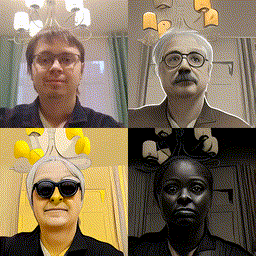

In [1]:
import subprocess
from IPython.display import Image

# Преобразуйте видео в GIF с помощью FFmpeg
input_video = "./data/ebsynth-maks-2/eb-res/2x2.mp4"
output_gif = "./data/ebsynth-maks-2/eb-res/maks-2x2.gif"

gif_width = 256
gif_height = 256

command = f"ffmpeg -i {input_video} -vf \"fps=10,scale={gif_width}:{gif_height}:flags=lanczos\" -c:v gif {output_gif}"
subprocess.run(command, shell=True, check=True)

# Отображение GIF в Jupyter Notebook
Image(filename=output_gif)


Черновики

In [ ]:
from pathlib import Path
from PIL import Image
import math

def create_grid(input_folder, num_rows=None):
    image_paths = sorted([p for p in input_folder.glob("*.png")])
    image_filenames = [p.name for p in image_paths]

    images = [Image.open(p) for p in image_paths]
    width, height = images[0].size
    
    if num_rows is None:
        grid_size = int(math.ceil(math.sqrt(len(images))))
        num_rows = grid_size
    else:
        grid_size = int(math.ceil(len(images) / num_rows))
        
    num_columns = grid_size
    grid_width = num_columns * width
    grid_height = num_rows * height
    grid_image = Image.new("RGB", (grid_width, grid_height))

    for i, image in enumerate(images):
        x = (i % num_columns) * width
        y = (i // num_columns) * height
        grid_image.paste(image, (x, y))

    return grid_image, num_rows, num_columns, image_filenames

input_folder = Path("./data/video-keys/")
grid_image, num_rows, num_columns, image_filenames = create_grid(input_folder)

output_image_path = "./data/video-grid/image_grid-v1.png"
grid_image.save(output_image_path)
